# Pregunta 1 primero binarizar

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imagen='coins.jpeg'
img = cv.imread(imagen)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [10]:
def imshow(title = 'Image', image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

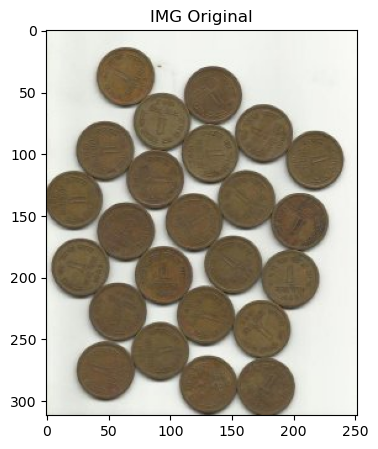

In [11]:
imshow("IMG Original", img)

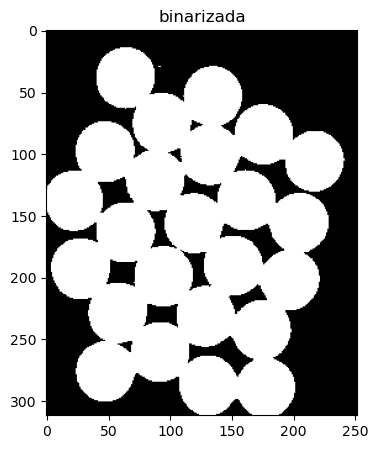

In [13]:
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
imshow("binarizada",thresh)
# cv.waitKey(0)
# cv.destroyAllWindows()

# Pregunta 1, imagen resultante después de aplicar operadores morfológicos

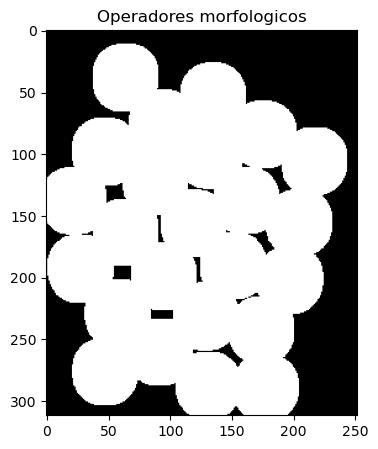

In [24]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv.dilate(opening,kernel,iterations=3)
imshow("Operadores morfologicos",sure_bg)
# RESPUESTA A

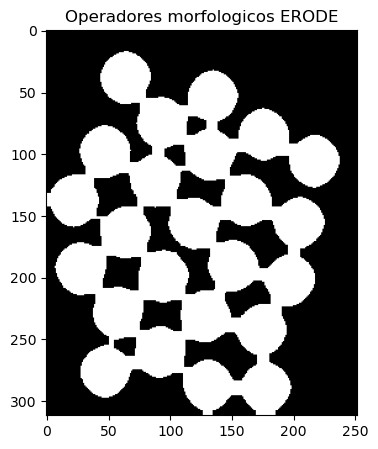

In [42]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
sure_bgP = cv.erode(opening,kernel,iterations=3)
imshow("Operadores morfologicos ERODE",sure_bgP)

# Pregunta 2 y 3 transformada de distancia

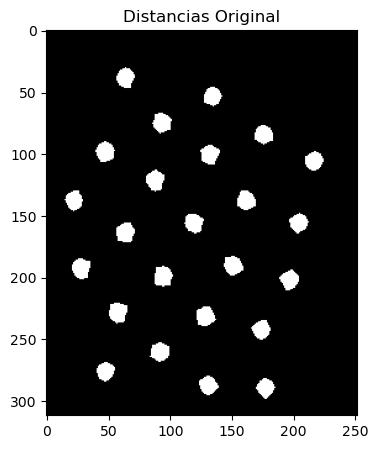

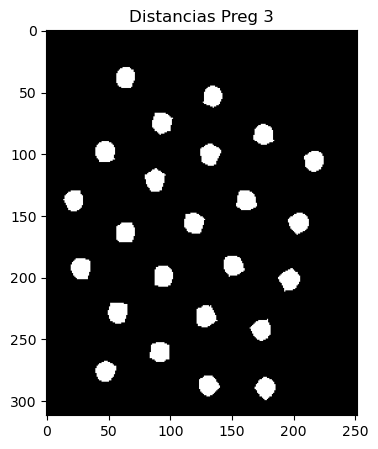

In [38]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
imshow("Distancias Original",sure_fg)
# RESPUESTA 2 = D

## RESPONDER PREGUNTA 3
A = 16
B = 74
C = 120
D = 65

retTest, sure_fgTest = cv.threshold(dist_transform, A, 255,0)
sure_fgTest = np.uint8(sure_fgTest)
imshow("Distancias Preg 3",sure_fgTest)
# RESPUESTA 3 = A


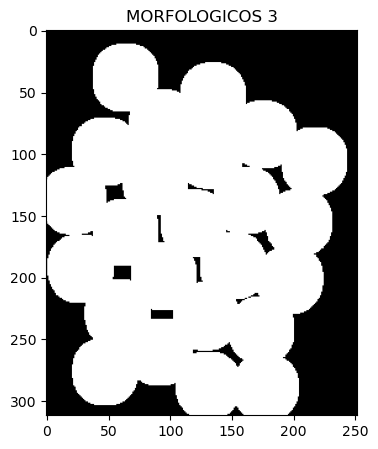

In [32]:
# PREGUNTA N3
kernel3 = np.ones((3,3), np.uint8)
opening3 = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel3, iterations=2)
sure_bg3 = cv.dilate(opening3, kernel3, iterations=3)
imshow("MORFOLOGICOS 3", sure_bg3)

# Pregunta 4 y 5

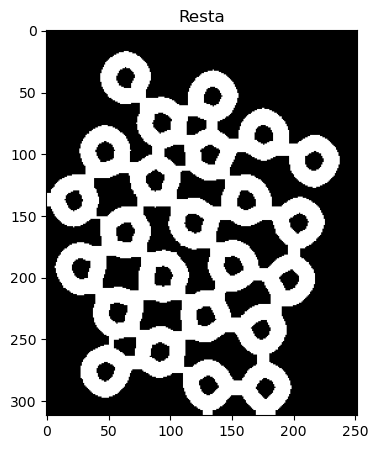

In [41]:
unknown = cv.subtract(sure_bg,sure_fg)
imshow("Resta",unknown)


# Pregunta6

In [ ]:
ret, markers = cv.connectedComponents(sure_fg)
print("lista de marcadores",np.unique(markers))
print("cantidad de etiquetas",ret)

markers = markers+1
markers[unknown==255] = 0


In [ ]:
markers2 = cv.watershed(img,markers)
img[markers2 == -1] = [255,0,0]
cv.imshow("Watershed",img)
cv.waitKey(0)


In [ ]:
label_hue = np.uint8(179*markers2/np.max(markers2))
cv.imshow('Componentes finales', label_hue)
cv.waitKey()
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
cv.imshow('Componentes finales', labeled_img)
cv.waitKey()
cv.destroyAllWindows()